# Company Research Proposal (1-5-1 Capstone)

## THE PROBLEM: 

Staff turnover is a costly problem, both in time to locate, hire, and train new employees as well as well as fiscal resources in contracting staffing solution services, productivity lost operating at sub-optimal staffing levels, and salary concessions that must be made above the desired median to compensate for said loss. Reducing employee churn, the the overall turnover in an organization's staff as existing employees leave and new ones are hired. 

The IT Solutions company in question, hereafter referred to as The Company, has been losing employees faster than they hire replacements. This creates a burden on the remaining staff, who in turn are likely to become disaffected and consider leaving as well. This deficit also reduces overall bandwidth of The Company. Shrinkage in workplace capacity is shrinkage of potential. 
Analysis of the performance evaluations of past and present staff show that the vast majority have met expectations with more exceeding expectations than failing to meet. 

Reviewing the reasons for why employees leave unhappiness, wanting more money, or finding another job (presumably for more money) are the top three reasons provided in exit interviews. If the “unhappiness” factor was not paired with fiscal concerns there would be sufficient reason to examine the workplace environment and atmosphere as prime culprits for fomenting unhappiness. But since the fiscal concern is paired, we can assume that inadequate monetary compensation is a prime candidate for cause of employees seeking other opportunities. 

So the problem being one of employee retention, or at the least slowing of terminations, be they voluntary to seek other opportunities or involuntary, often owing to behaviors associated with dissatisfaction with The Company’s satisfaction of the psychological contract, noting that salary satisfaction and psychological contract are significantly/positively correlated*.

* Lee, H., & Lin, M. (2014). A study of salary satisfaction and job enthusiasm - mediating effects of psychological contract. Applied Financial Economics, 24(24), 1577-1583. doi:10.1080/09603107.2013.829197

The first step to performing this analysis is to import, clean, and format the dataset for all employees from HR. 

In [553]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
%matplotlib inline

In [554]:
#IMPORT CSV AND CONVERT COLUMN HEADERS FOR EASE OF HANDLING
staff = pd.read_csv('production_staff.csv')
staff.rename(columns={
    'Employee Name': 'name',
    'Race Desc': 'race',
    'Date of Hire': 'hire_date',
    'TermDate': 'term_date',
    'Reason for Term': 'term_reason',
    'Employment Status': 'employment_status',
    'Department': 'department',
    'Position': 'position',
    'Pay': 'pay',
    'Annual Pay': 'annual_pay',
    'Manager Name': 'manager_name',
    'Performance Score': 'performance_score'}, inplace=True)

In [555]:
#CONVERT HIRE AND TERM DATES TO FORMAT YYYY-MM-DD
staff['term_date'] = pd.to_datetime(staff['term_date'])
staff['hire_date'] = pd.to_datetime(staff['hire_date'])

In [556]:
#REMOVE SYMBOLS FROM PAY AND CONVERT TO FLOAT
staff['pay'] = staff['pay'].str.replace("$", "")
staff['pay'] = pd.to_numeric(staff['pay']).astype(float)

In [557]:
#REMOVE SYMBOLS FROM ANNUAL PAY AND CONVERT TO FLOAT
staff['annual_pay'] = staff['annual_pay'].str.replace("$", "")
staff['annual_pay'] = staff['annual_pay'].str.replace(",", "")
staff['annual_pay'] = pd.to_numeric(staff['annual_pay']).astype(float)

In [558]:
staff['pay'].head()

0    54.5
1    50.5
2    55.0
3    51.0
4    54.0
Name: pay, dtype: float64

In [559]:
#CREATE COLUMN WITH 1-6 RATING BASED ON EMPLOYEED PERFORMANCE SCORE
performance_rating = {"N/A- too early to review":3 ,"Needs Improvement":1, "PIP":2, "90-day meets" :3,"Fully Meets":4,"Exceeds":5, "Exceptional":6}
staff['performance_rating'] = staff['performance_score'].apply(performance_rating.get).astype(float)

In [560]:
staff['hire_year'] = staff['hire_date'].dt.year
staff['active_1_0'] = staff['employment_status']
staff['active_1_0'] = np.where(staff['employment_status']=='Active', '1', '0')
#CREATE LIST FIRST BEFORE CREATING COLUMN.

In [562]:
staff_active = staff[staff.employment_status == 'Active']
staff_active.reset_index()

,index,name,race,hire_date,term_date,term_reason,employment_status,department,position,pay,annual_pay,manager_name,performance_score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints,performance_rating,hire_year,active_1_0
0,0,"Albert, Michael",White,2011-08-01,NaT,N/A - still employed,Active,Production,Production Manager,54.50,113360.0,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,4.0,2011,1
1,2,"Butler, Webster L",White,2016-01-28,NaT,N/A - still employed,Active,Production,Production Manager,55.00,114400.0,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0,5.0,2016,1
2,3,"Dunn, Amy",White,2014-09-18,NaT,N/A - still employed,Active,Production,Production Manager,51.00,106080.0,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,4.0,2014,1
3,4,"Gray, Elijiah",White,2015-06-02,NaT,N/A - still employed,Active,Production,Production Manager,54.00,112320.0,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,4.0,2015,1
4,7,"Liebig, Ketsia",White,2013-09-30,NaT,N/A - still employed,Active,Production,Production Manager,55.00,114400.0,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0,5.0,2013,1
5,8,"Miller, Brannon",Hispanic,2012-08-16,NaT,N/A - still employed,Active,Production,Production Manager,53.00,110240.0,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,4.0,2012,1
6,10,"Spirea, Kelley",White,2012-10-02,NaT,N/A - still employed,Active,Production,Production Manager,52.00,108160.0,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,4.0,2012,1
7,11,"Stanley, David",White,2010-07-20,NaT,N/A - still employed,Active,Production,Production Manager,53.00,110240.0,Elisa Bramante,Needs Improvement,0.0,0.0,0.0,0.0,1.0,2010,1
8,12,"Sullivan, Kissy",Black or African American,2009-01-08,NaT,N/A - still employed,Active,Production,Production Manager,55.00,114400.0,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0,4.0,2009,1
9,14,"Adinolfi, Wilson K",White,2011-07-05,NaT,N/A - still employed,Active,Production,Production Technician I,20.00,41600.0,Michael Albert,Exceeds,15.0,17.0,0.0,0.0,5.0,2011,1


In [563]:
staff_active.hire_date.dtype

dtype('<M8[ns]')

In [564]:
staff_active['hire_year'] = staff_active['hire_date'].dt.year
staff_inactive = staff[staff.employment_status != 'Active']
staff_inactive['term_year'] = staff_inactive['term_date'].dt.year
# KEVIN -- WHY IS THE TERM YEAR A FLOAT AND NOT THE HIRE YEAR AND WHY CAN'T I CONVERT IT??

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


These plots below demonstrate that the bulk of the hiring took place in the early 2010s with significant dropoff after as well as a consistent rate of emoployees being terminated, either volunatrily or involuntarily, afer 2010. This tells us that we are trending at a net deficit per year for staffing. As previously stated, the reduction of satisfied staff is a reduction of aggregate capacity for The Company, and must be stemmed and reversed. 

Text(0,0.5,'Number of Employees')

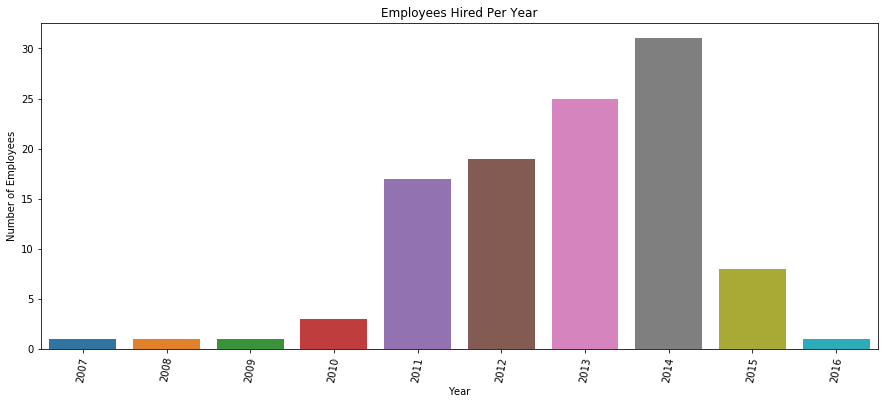

In [565]:
plt.figure(figsize=(15,6))
plt.title('Employees Hired Per Year')
plt.xticks(rotation=80)
sns.countplot(x="hire_year", data=staff_active)
plt.xlabel('Year')
plt.ylabel('Number of Employees')

Text(0,0.5,'Number of Employees')

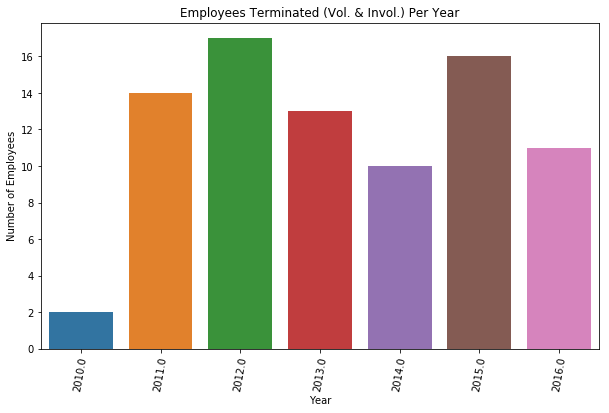

In [566]:
plt.figure(figsize=(10,6))
plt.title('Employees Terminated (Vol. & Invol.) Per Year')
plt.xticks(rotation=80)
sns.countplot(x="term_year", data=staff_inactive)
plt.xlabel('Year')
plt.ylabel('Number of Employees')

In [568]:
#KEVIN -- I WANT TO CREATE A BARPLOT WITH SIDE-BY-SIDE BARS PER YEAR OF NUMBER OF EMPLOYEES HIRED/TERMED. CAN'T FIGURE IT
#KEVIN -- I'D LIKE TO INCLUDE A LINE GRAPH WITH THE TOTAL NUMBER OF ACTIVE EMPLOYEES ON THAT CHART. 

In [569]:
staff.employment_status.unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause',
       'Leave of Absence', 'Future Start'], dtype=object)

To deal with differences in compensation and numbers within ranks, each tier of the Production team is broken up into their constituent levels: Production Technician I, Production Technician II, and Production Manager. 

In [570]:
staff_tier1 = staff[staff.position == 'Production Technician I']
staff_tier2 = staff[staff.position == 'Production Technician II']
staff_tier3 = staff[staff.position == 'Production Manager']
staff_active_tier1 = staff_active[staff_active.position == 'Production Technician I']
staff_active_tier2 = staff_active[staff_active.position == 'Production Technician II']
staff_active_tier3 = staff_active[staff_active.position == 'Production Manager']

(array([1., 1., 2., 5.]),
 array([106080., 108160., 110240., 112320., 114400.]),
 <a list of 4 Patch objects>)

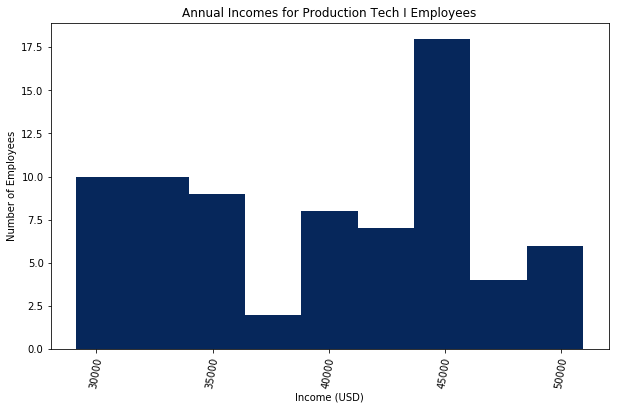

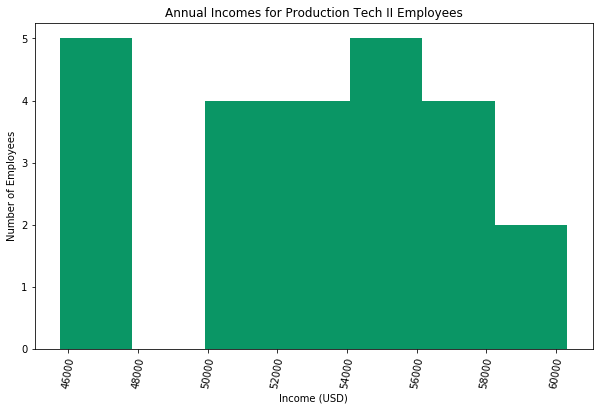

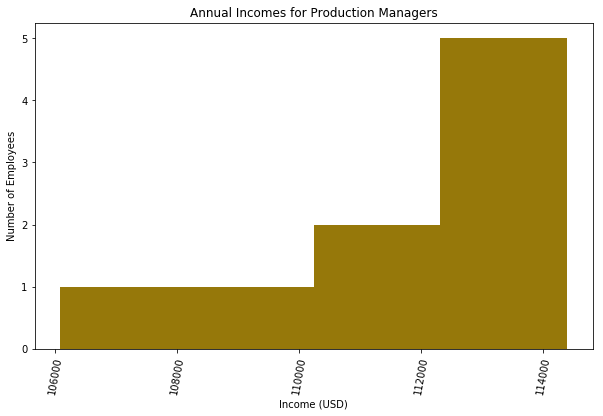

In [571]:
plt.figure(figsize=(10,6))
plt.title('Annual Incomes for Production Tech I Employees')
plt.xlabel('Income (USD)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=80)
plt.hist(staff_active_tier1['annual_pay'], bins=9, color='#06275b')

plt.figure(figsize=(10,6))
plt.title('Annual Incomes for Production Tech II Employees')
plt.xlabel('Income (USD)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=80)
plt.hist(staff_active_tier2['annual_pay'], bins=7, color='#0a9665')

plt.figure(figsize=(10,6))
plt.title('Annual Incomes for Production Managers')
plt.xlabel('Income (USD)')
plt.ylabel('Number of Employees')
plt.xticks(rotation=80)
plt.hist(staff_active_tier3['annual_pay'], bins=4, color='#96780a')

The bimodal, plateau, and right skewed distribution of annual salaries of currently employed staff is problematic, particularly at the lowest tier where salaries should be much more normally distributed. Our proposal seeks to accomplish this over time by culling small percentages from each tier on a regular schedule leaving management to backfill along a more normal distribution. But first, we must analyze each tier's salary structure to calculate the targets and benefits of this proposal

In [572]:
#The summary statistics for Production Technician I
staff_active_tier1['annual_pay'].describe()

count       74.000000
mean     39702.983784
std       6290.289100
min      29120.000000
25%      33280.000000
50%      39520.000000
75%      45760.000000
max      50960.000000
Name: annual_pay, dtype: float64

In [573]:
#The summary statistics for Production Technician II
staff_active_tier2['annual_pay'].describe()

count       24.000000
mean     52280.800000
std       4326.617386
min      45760.000000
25%      49920.000000
50%      52000.000000
75%      55208.400000
max      60320.000000
Name: annual_pay, dtype: float64

In [574]:
#The summary statistics for Production Managers
staff_active_tier3['annual_pay'].describe()

count         9.000000
mean     111511.111111
std        3022.169934
min      106080.000000
25%      110240.000000
50%      112320.000000
75%      114400.000000
max      114400.000000
Name: annual_pay, dtype: float64

But how can we solve the problem of employee churn and low employee satisfaction without first understanding the reasons why employees have left in the past as well as analyzing the amount of churn per year? The code below accomplishes that. 

In [575]:
staff_inactive = staff[staff.employment_status != 'Active']

In [576]:
staff_inactive = staff_inactive[staff_inactive.employment_status != 'N/A - still employed']

Text(0,0.5,'Number of Incidents')

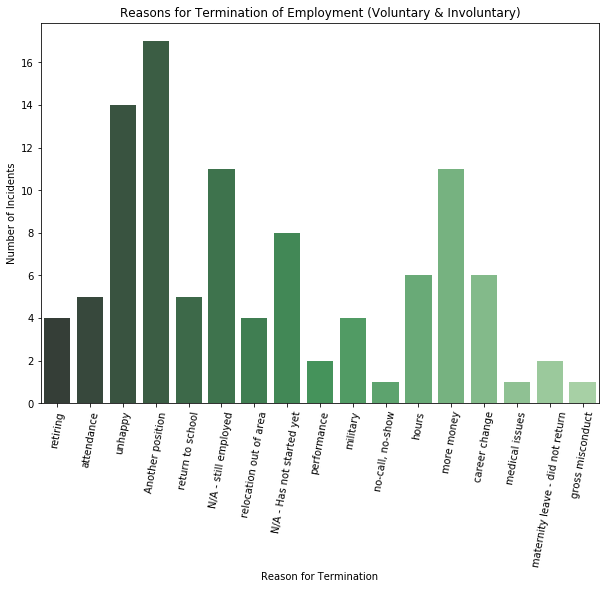

In [577]:
plt.figure(figsize=(10,7))
plt.title('Reasons for Termination of Employment (Voluntary & Involuntary)')
plt.xticks(rotation=80)
sns.countplot(x="term_reason", data=staff_inactive, palette="Greens_d")
plt.xlabel('Reason for Termination')
plt.ylabel('Number of Incidents')

Reviewing the reasons for termination it is clear what the most oft cited sources of employee frustration is: the perception of inadequate compensation and lack of opportunity for advancement. In an environment like that one might expect employee reviews to reflect degraded quality and quantity of work. The analysis of employee performance reviews is below. 

Text(0,0.5,'Performance Rating')

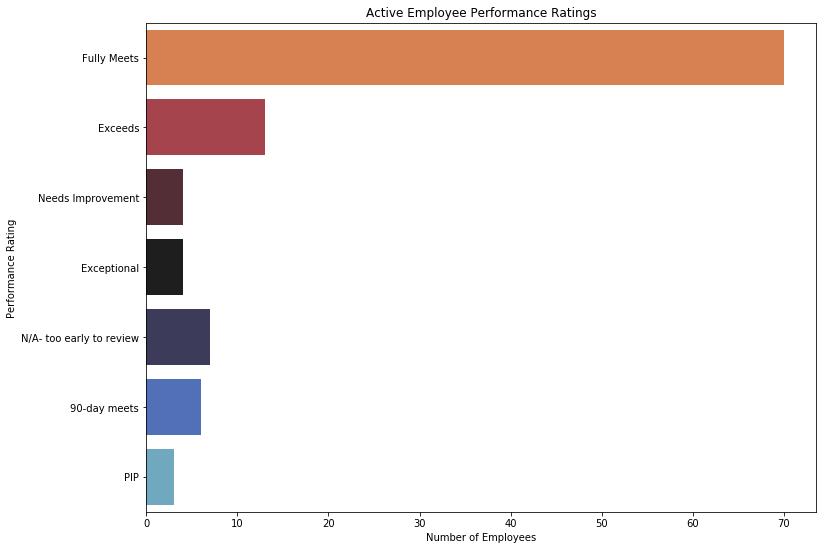

In [579]:
plt.figure(figsize=(12,9))
sns.countplot(y="performance_score", data=staff_active, palette="icefire_r")
plt.title('Active Employee Performance Ratings')
plt.xlabel('Number of Employees')
plt.ylabel('Performance Rating')
#HOW DO i CHANGE THE ORDER OF THIS LAYOUT?

Interestingly, over 90% of the current staff are performing well enough, with about 18% performing above expectations. This would indicate that the metrics to which employees are being held are inadequate for assessing their true capacity. With such a high churn rate, particularly through so many voluntary resignations, there should be a much higher percentage of "Needs Improvement" and "PIP" (performance improvement plan) ratings. The proposal will include a complete overhaul of metrics to which production staff and managers will be held. 

A common complaint from lower echelons is that management is overpaid and too plentiful. We can disabuse ourselves of the latter as there are only 9 managers active for 98 production staff, unless the Production Managers have only the Production Technician II employees as direct reports. If that is the case, a restructuring to keep both production tiers under group managers will be strongly suggested. 

But is management paid inordinately more for supervision than the production staff that does the bulk of the work? The graphic below does in fact show a large disparity between managers and production staff. Managers, with a mean salary of $111,511 are not overpaid. This adds even more support to our assertion that staff compensation levels are inadequate to gain employee loyalty, and therefore employee retention. 

Text(0,0.5,'Salary Range USD')

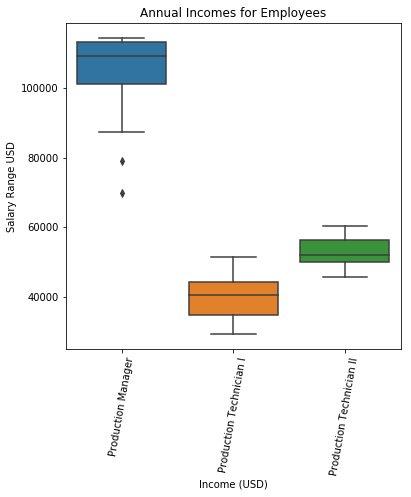

In [581]:
plt.figure(figsize=(6,6))
plt.title('Annual Incomes for Employees')
plt.xticks(rotation=80)
sns.boxplot(x="position", y="annual_pay", data=staff)
plt.xlabel('Income (USD)')
plt.ylabel('Salary Range USD')

## THE POTENTIAL SOLUTION: 

Upon evaluating the staffing for indications of sensitivity to the negative impacts and finding them unlikely to pose a significant increase to employee turnover management will conduct a 12 month Vitality Curve implementation which is known to increase satisfaction among employees who reap the benefits of salary increases, equity options, and promotions*. 

A common downside of the vitality curve is that the increased competitiveness it fosters among the staff is a source of stress and concern for those uncomfortable with peer competition and fearful of their position in the lowest ranks. To these points, we ask management to consider the following: 

Employee turnover, as charted above, is already high and the source likely rooted in lack of adequate compensation and opportunities for advancement. The opening of potential to both should serve to alleviate these concerns among much of the staff. 

The rate of termination for non-voluntary reasons is commensurate with the percentages of staff that can be expected to be purged through the process. 

The tech field is already one of rampant competitiveness and one-upmanship. Framing the narrative around simply adopting this established tradition as SOP with real benefits to those who rise above may not only assuage the stress of the environment, but create a renewed vigor among those staff members already engaged in the practice. 

* Welch, J. (2005). The vitality curve. Leadership Excellence, 22(9), 4-5. Retrieved from https://search-proquest-com.contentproxy.phoenix.edu/docview/204618282?accountid=35812

## METHOD OF TEST: 

Prior to initial rollout, all employees will be required to submit an anonymous employee satisfaction survey to set baseline metrics for comparison at the end of the program. 

Over the course of 12 months employees will be given monthly, quarterly, semi-annual, and a final annual ranking at the end of the 12-month period. This will be conducted at all three tiers in the Production arena (Production Technician I, Production Technician II, & Production Managers). At the six-month mark, the first cuts and rewards will be administered as follows:

* The lowest 5% ranked of all three tiers will be terminated. Doing so will free up an expected 374,879 (USD) from the means of current salary payouts to the three tiers combined. The numbers below represent the likeliest savings from 5% terminations, rounded up.
 - Production Technician I - 39,702 * 4 = 158,808
 - Production Technician II - 52,280 * 2 = 104,560
 - Production Manager - 111,511 * 1 = 111,511
 
* The top performing 5% of each tier will receive a bonus equivalent to 10% annual salary and a 15% pay increase.
 - Production Technician I - 
      - Bonus: 3,970 * 4 = 15,880
      - Salary Bump: 5,955 * 4 = 23,821
      - Total: 39,701
 - Production Technician II - 52,280 * 2 = 104,560
      - Bonus: 5,228 * 2 = 10,456
      - Salary Bump: 7,842 * 2 = 15,684
      - Total: 26,140
 - Production Manager - 111,511 * 1 = 111,511
      - Bonus: 11,151
      - Salary Bump: 16,726
      - Total: 27,877
 - Totals - 
      - Bonuses: 37,487 
      - Annual increases: 72,957
      - Total: 110,444

* The remaining expected savings of 264,435 in savings will be retained for increased bonuses, ownership options, and salary increases for the 12-month review as well as creating salaried positions within the Production Technician tiers as needed, advertising the system in place to attract workers who find a Vitality Curve preferential. 

At the end of the 12-month period, another 5% will be culled. The top 5% will be given the choice of bonus and salary increase or bonus and promotion to the next tier with a salary increase set to the recalculated mean of that tier. 

Staff reviews and rankings will be conducted by direct management upon those rankings being reviewed by a randomly selected peer to double-check metrics evaluation has been performed correctly and without bias. 

Salary caps will be established at the 24-month mark should the program be proven successful and its implementation made permanent. 

The program will be deemed successful with the following indicators:

* 15% increase in aggregate productive output
* No more than 20% increase in voluntary resignations in the first six months, falling to no more than 110% normal levels at year-end, compared to other year’s mean churn. 
* 20% increase in candidate applications for new positions advertised including the system at year’s end. 
* 15% increase in weighted mean employee satisfaction from rollout to year’s end, tracked using the mandatory employee satisfaction survey at quarterly checkpoints. 